In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('dataset/with mask/00001_Mask.jpg')

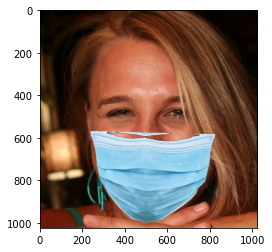

In [3]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [4]:
img.shape

(1024, 1024, 3)

In [5]:
img_size=224
dataset_Directory ="Dataset/"
training_Data =[]

classes = ["with mask","without mask"]
def create_training_data():
    for category in classes:
        path = os.path.join(dataset_Directory,category)
        class_index= classes.index(category)
        for imge in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,imge))
                new_array= cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_index])
            except Exception as e:
                print(e)
                pass
        
        

In [6]:
create_training_data()

In [7]:
print(len(training_Data))

1950


In [8]:
import random
random.shuffle(training_Data)

In [9]:
X=[] #feature
y=[] #label

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,img_size,img_size,3)

In [10]:
X.shape

(1950, 224, 224, 3)

In [11]:
X=X/255.0 #normalize the data

In [12]:
Y = np.array(y)
Y.shape


(1950,)

In [ ]:
import pickle

pickle_out =open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out =open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()